In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Reading the csv for ML
df = pd.read_csv('hotel_for_ML.csv')

In [4]:
pd.set_option("display.max_columns",None)
df.tail()

,IsCanceled,LeadTime,ArrivalDate,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Country,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,Hotel_City Hotel,Hotel_Resort Hotel,Meal_BB,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ReservationStatus
119385,0,23,2017-August,2017,7,35,30,2,5,2,0.0,0,15.0,0,0,0,0,0,0,217.0,0.0,0,96.14,0,0,2017-09-06,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119386,0,102,2017-August,2017,7,35,31,2,5,3,0.0,0,56.0,0,0,0,4,4,0,324.0,0.0,0,225.43,0,2,2017-09-07,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119387,0,34,2017-August,2017,7,35,31,2,5,2,0.0,0,43.0,0,0,0,3,3,0,324.0,0.0,0,157.71,0,4,2017-09-07,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119388,0,109,2017-August,2017,7,35,31,2,5,2,0.0,0,59.0,0,0,0,0,0,0,323.0,0.0,0,104.40,0,0,2017-09-07,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119389,0,205,2017-August,2017,7,35,29,2,7,2,0.0,0,43.0,0,0,0,0,0,0,324.0,0.0,0,151.20,0,2,2017-09-07,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1


In [5]:
df = df.drop(columns=['ArrivalDate','ReservationStatusDate'])

In [6]:
df.tail()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Country,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,Agent,Company,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Hotel_City Hotel,Hotel_Resort Hotel,Meal_BB,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,DepositType_No Deposit,DepositType_Non Refund,DepositType_Refundable,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ReservationStatus
119385,0,23,2017,7,35,30,2,5,2,0.0,0,15.0,0,0,0,0,0,0,217.0,0.0,0,96.14,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119386,0,102,2017,7,35,31,2,5,3,0.0,0,56.0,0,0,0,4,4,0,324.0,0.0,0,225.43,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119387,0,34,2017,7,35,31,2,5,2,0.0,0,43.0,0,0,0,3,3,0,324.0,0.0,0,157.71,0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119388,0,109,2017,7,35,31,2,5,2,0.0,0,59.0,0,0,0,0,0,0,323.0,0.0,0,104.40,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
119389,0,205,2017,7,35,29,2,7,2,0.0,0,43.0,0,0,0,0,0,0,324.0,0.0,0,151.20,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1


In [7]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'Hotel_City Hotel', 'Hotel_Resort Hotel', 'Meal_BB       ',
       'Meal_FB       ', 'Meal_HB       ', 'Meal_SC       ', 'Meal_Undefined',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'MarketSegment_Undefined',
       'DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChann

In [8]:
#without features:  ReservationStatus,  ArrivalDate, ReservationStatusDate
x=df[['LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Country', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'Hotel_City Hotel', 'Hotel_Resort Hotel', 'Meal_BB       ',
       'Meal_FB       ', 'Meal_HB       ', 'Meal_SC       ', 'Meal_Undefined',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'MarketSegment_Undefined',
       'DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'DistributionChannel_Undefined', 'DepositType_No Deposit     ',
       'DepositType_Non Refund     ', 'DepositType_Refundable     ',
       'CustomerType_Contract', 'CustomerType_Group', 'CustomerType_Transient',
       'CustomerType_Transient-Party']]
y=df[['IsCanceled']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1111)

# A. Model Training

## 1. Logistic Regression

Before Tuning

In [15]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     15130
           1       0.69      0.53      0.60      8748

    accuracy                           0.74     23878
   macro avg       0.72      0.70      0.70     23878
weighted avg       0.73      0.74      0.73     23878

0.7404724013736493


Tuning

In [17]:
log_model = LogisticRegression()
params = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
gridsearch = GridSearchCV(estimator = log_model, param_grid = params, cv = 10, scoring = 'accuracy',verbose = 1, n_jobs = -1)
gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   31.8s finished


{'C': 0.01, 'penalty': 'l2'}
0.7371954264043492


After Tuning

In [16]:
log_model_tuned = LogisticRegression(penalty='l2',C=0.01)
log_model_tuned.fit(x_train,y_train)
y_pred = log_model_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     15130
           1       0.69      0.54      0.60      8748

    accuracy                           0.74     23878
   macro avg       0.72      0.70      0.71     23878
weighted avg       0.73      0.74      0.73     23878

0.7408911969176648


## 2. Support Vector Machine

Before Tuning

In [10]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     15130
           1       0.98      0.36      0.52      8748

    accuracy                           0.76     23878
   macro avg       0.85      0.68      0.68     23878
weighted avg       0.82      0.76      0.72     23878

0.7612027808024122


Tuning

In [26]:
svc_model = LinearSVC()
params = {'penalty': ['l1', 'l2'],'C': [0.001,.009,0.01,.09,1,5,10,25]}
gridsearch = GridSearchCV(estimator = svc_model, param_grid = params, cv = 10, scoring = 'accuracy',verbose = 1, n_jobs = -1)
gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.9min finished


{'C': 0.001, 'penalty': 'l2'}
0.7576956070882455


After Tuning

In [27]:
svc_model_tuned = LinearSVC(penalty='l2', C=0.001)
svc_model_tuned.fit(x_train,y_train)
y_pred = svc_model_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     15130
           1       0.84      0.54      0.66      8748

    accuracy                           0.79     23878
   macro avg       0.81      0.74      0.75     23878
weighted avg       0.80      0.79      0.78     23878

0.7928637239299774


## 3. K-Nearest Neighbors

Before Tuning

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     15130
           1       0.73      0.75      0.74      8748

    accuracy                           0.81     23878
   macro avg       0.79      0.80      0.79     23878
weighted avg       0.81      0.81      0.81     23878

0.8075215679705168


Tuning

In [29]:
knn = KNeighborsClassifier()
params = dict(n_neighbors = range(1,5))
gridsearch = GridSearchCV(estimator = knn, param_grid = params, cv = 10, scoring = 'accuracy',verbose = 1, n_jobs = -1)
gridsearch.fit(x_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   27.8s finished


{'n_neighbors': 2}
0.8151018031647785


After Tuning

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_tuned = KNeighborsClassifier(n_neighbors=2)
knn_tuned.fit(x_train,y_train)
y_pred = knn_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     15130
           1       0.83      0.62      0.71      8748

    accuracy                           0.82     23878
   macro avg       0.82      0.77      0.79     23878
weighted avg       0.82      0.82      0.81     23878

0.8150180082083927


## 4. Decision Tree

Before Tuning

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     15130
           1       0.80      0.81      0.80      8748

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878

0.8538822346930228


Tuning

In [15]:
#hypertune decision tree with RandomizedSearchCV
tree = DecisionTreeClassifier()
params = {'max_depth': [3,5,10,15,20,25,30]}
grid=RandomizedSearchCV(tree, cv=10, param_distributions=param, scoring = 'accuracy', verbose = 1, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8614205781376081
{'max_depth': 15}


In [16]:
#hypertune decision tree with GridSearchCV
tree = DecisionTreeClassifier()
params = {'max_depth': [3,5,10,15,20,25,30]}
grid=GridSearchCV(tree, cv=10, param_grid=params, scoring = 'accuracy', verbose = 1, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8614415216416427
{'max_depth': 15}


After Tuning

In [26]:
tree_tuned = DecisionTreeClassifier(max_depth=15)
tree_tuned.fit(x_train,y_train)
y_pred = tree_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     15130
           1       0.81      0.80      0.80      8748

    accuracy                           0.86     23878
   macro avg       0.85      0.84      0.84     23878
weighted avg       0.86      0.86      0.86     23878

0.8561856101851076


## 5. Random Forest

Before Tuning

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1111)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15130
           1       0.88      0.81      0.85      8748

    accuracy                           0.89     23878
   macro avg       0.89      0.87      0.88     23878
weighted avg       0.89      0.89      0.89     23878

0.8914481949912053


Tuning

In [28]:
#hypertune random forest with GridSearchCV
forest = RandomForestClassifier(random_state=1111)
n_estimators = [100, 300, 500, 800, 1000, 1200]
max_depth = [5, 10, 15, 25, 30, 40, 50]

params = dict(n_estimators = n_estimators, max_depth = max_depth)

grid = GridSearchCV(forest, params, cv = 10, scoring = 'accuracy', verbose = 1, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 144.8min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed: 347.6min finished


0.8954687045933607
{'max_depth': 30, 'n_estimators': 800}


After Tuning

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_tuned = RandomForestClassifier(random_state=1111, max_depth=30, n_estimators=800)
forest_tuned.fit(x_train,y_train)
y_pred = forest_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15130
           1       0.88      0.81      0.85      8748

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

0.892202026970433


## 6. AdaBoost Classifier

Before Tuning

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(learning_rate = 1, n_estimators = 500)
ada_model.fit(x_train, y_train)
y_pred = ada_model.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     15130
           1       0.82      0.70      0.76      8748

    accuracy                           0.84     23878
   macro avg       0.83      0.81      0.82     23878
weighted avg       0.83      0.84      0.83     23878

0.8359159058547617


Tuning

In [32]:
ada_model = AdaBoostClassifier()
params = {'n_estimators': [10, 50, 100, 500, 1000],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]}
grid=GridSearchCV(ada_model, cv=10, param_grid=params, scoring = 'accuracy', verbose = 1, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 27.0min finished


0.8417790591967972
{'learning_rate': 1.0, 'n_estimators': 1000}


After Tuning

In [33]:
ada_model_tuned = AdaBoostClassifier(learning_rate = 1, n_estimators = 1000)
ada_model_tuned.fit(x_train, y_train)
y_pred = ada_model_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     15130
           1       0.82      0.71      0.76      8748

    accuracy                           0.84     23878
   macro avg       0.83      0.81      0.82     23878
weighted avg       0.84      0.84      0.83     23878

0.8364184605075802


## 7. XGB Classifier

Before Tuning

In [34]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     15130
           1       0.85      0.82      0.83      8748

    accuracy                           0.88     23878
   macro avg       0.87      0.87      0.87     23878
weighted avg       0.88      0.88      0.88     23878

0.8811458246084262


Tuning

In [35]:
xgb_model = XGBClassifier()
params = {'n_estimators': [50,100,500,1000,1100],
         'learning_rate': [0.001,0.01,0.01,0.05,0.1,0.3,1]}
grid=GridSearchCV(xgb_model, cv=10, param_grid=params, scoring = 'accuracy', verbose = 1, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 65.3min finished


0.8925266284042976
{'learning_rate': 0.3, 'n_estimators': 1100}


After Tuning

In [36]:
xgb_model_tuned = XGBClassifier(n_estimators =1100, learning_rate = 0.3)
xgb_model_tuned.fit(x_train, y_train)
y_pred = xgb_model_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     15130
           1       0.86      0.83      0.85      8748

    accuracy                           0.89     23878
   macro avg       0.88      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

0.890191808359159


# B. Model Evaluation and Comparison

Accuracy Comparison of Different Models

In [11]:
modelaccuracy = {'Models':['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','AdaBoost','XGBoost'],
                 'Before Tuning':[74.04,76.12,80.75,85.39,89.14,83.59,88.11],
                 'After Tuning': [74.09,79.29,81.50,85.62,89.22,83.64,89.02]}
modelaccuracy_df = pd.DataFrame(modelaccuracy)

In [12]:
modelaccuracy_df

,Models,Before Tuning,After Tuning
0,Logistic Regression,74.04,74.09
1,SVM,76.12,79.29
2,KNN,80.75,81.50
3,Decision Tree,85.39,85.62
4,Random Forest,89.14,89.22
5,AdaBoost,83.59,83.64
6,XGBoost,88.11,89.02


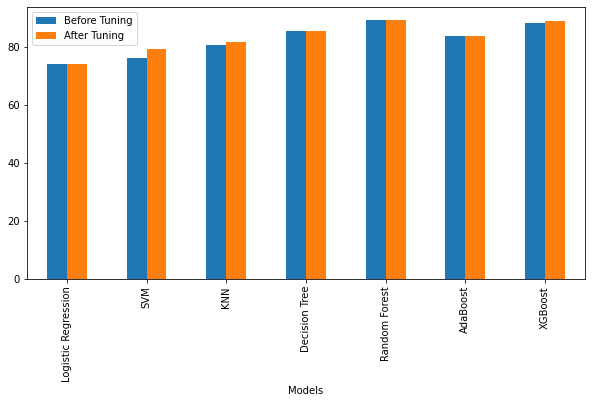

In [13]:
modelaccuracy_df.plot(x='Models', y=['Before Tuning', 'After Tuning'], kind="bar", figsize=(10,5))

ROC Analysis on Different Models

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
#https://analyticsindiamag.com/roc-auc-curve-for-comprehensive-analysis-of-machine-learning-models/

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


In [16]:
# Defining all the models for comparison
clf1 = LogisticRegression(penalty='l2',C=0.01)
clf2 = LinearSVC(penalty='l2', C=0.001)
clf3 = KNeighborsClassifier(n_neighbors=2)
clf4 = DecisionTreeClassifier(max_depth=15)
clf5 = RandomForestClassifier(random_state=1111, max_depth=30, n_estimators=800)
clf6 = AdaBoostClassifier(learning_rate = 1, n_estimators = 1000)
clf7 = XGBClassifier(n_estimators =1100, learning_rate = 0.3)


In [17]:
# Predicting probabilities for testing data
probas1_ = clf1.fit(x_train, y_train).predict_proba(x_test)
probas2_ = clf2.fit(x_train, y_train)._predict_proba_lr(x_test)
probas3_ = clf3.fit(x_train, y_train).predict_proba(x_test)
probas4_ = clf4.fit(x_train, y_train).predict_proba(x_test)
probas5_ = clf5.fit(x_train, y_train).predict_proba(x_test)
probas6_ = clf6.fit(x_train, y_train).predict_proba(x_test)
probas7_ = clf7.fit(x_train, y_train).predict_proba(x_test)

In [24]:
# Computing the ROC curve and AUC score for all classifiers
fp1, tp1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc_model3 = auc(fp3, tp3)
fp4, tp4, thresholds4 = roc_curve(y_test, probas4_[:, 1])
roc_auc_model4 = auc(fp4, tp4)
fp5, tp5, thresholds5 = roc_curve(y_test, probas5_[:, 1])
roc_auc_model5 = auc(fp5, tp5)
fp6, tp6, thresholds6 = roc_curve(y_test, probas6_[:, 1])
roc_auc_model6 = auc(fp6, tp6)
fp7, tp7, thresholds7 = roc_curve(y_test, probas7_[:, 1])
roc_auc_model7 = auc(fp7, tp7)
print("AUC for Logistic Regression: ",roc_auc_model1)
print("AUC for SVC:", roc_auc_model2)
print("AUC for KNN:", roc_auc_model3)
print("AUC for Decision Tree:" ,roc_auc_model4)
print("AUC for Random Forest:", roc_auc_model5)
print("AUC for AdaBoost:" ,roc_auc_model6)
print("AUC for XGBoost:", roc_auc_model7)

AUC for Logistic Regression:  0.7768861302940436
AUC for SVC: 0.8607108005576424
AUC for KNN: 0.8383403847043048
AUC for Decision Tree: 0.921641887515938
AUC for Random Forest: 0.9595795515228333
AUC for AdaBoost: 0.9201905351003089
AUC for XGBoost: 0.9586239861151532


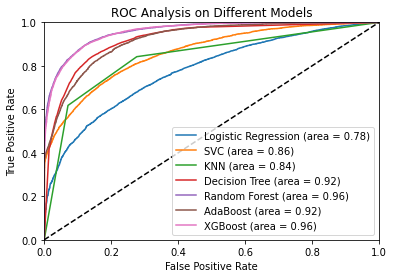

In [25]:
# Plotting the roc curve to visualize the performance of all 7 models
plt.clf()
plt.plot(fp1, tp1, label='Logistic Regression (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='SVC (area = %0.2f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='KNN (area = %0.2f)' % roc_auc_model3)
plt.plot(fp4, tp4, label='Decision Tree (area = %0.2f)' % roc_auc_model4)
plt.plot(fp5, tp5, label='Random Forest (area = %0.2f)' % roc_auc_model5)
plt.plot(fp6, tp6, label='AdaBoost (area = %0.2f)' % roc_auc_model6)
plt.plot(fp7, tp7, label='XGBoost (area = %0.2f)' % roc_auc_model7)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis on Different Models')
plt.legend(loc="lower right")
plt.show()

# C. Feature Importance

## 1. Random Forest

In [41]:
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children','Babies', 'Country', 'IsRepeatedGuest', 'PreviousCancellations','PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType','BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'ADR','RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'Hotel_City Hotel', 'Hotel_Resort Hotel', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Meal_SC', 'Meal_Undefined',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'MarketSegment_Undefined',
       'DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'DistributionChannel_Undefined', 'DepositType_No Deposit',
       'DepositType_Non Refund', 'DepositType_Refundable',
       'CustomerType_Contract', 'CustomerType_Group', 'CustomerType_Transient','CustomerType_Transient-Party']

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_tuned = RandomForestClassifier(random_state=1111, max_depth=30, n_estimators=800)
forest_tuned.fit(x_train,y_train)
y_pred = forest_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15130
           1       0.88      0.81      0.85      8748

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

0.892202026970433


Scikit-learn Feature Importance

In [44]:
forest_importance = forest_tuned.feature_importances_

In [45]:
# Saving the feature importance into a dictionary
forest_dict = dict(zip(features,forest_importance))

In [46]:
forest_dict

{'LeadTime': 0.11307447580130135,
 'ArrivalDateYear': 0.022416101459949978,
 'ArrivalDateMonth': 0.02794143670147939,
 'ArrivalDateWeekNumber': 0.04584599757581797,
 'ArrivalDateDayOfMonth': 0.04748695448591063,
 'StaysInWeekendNights': 0.020649512482720817,
 'StaysInWeekNights': 0.032270254446823195,
 'Adults': 0.012059694628596837,
 'Children': 0.005732511215317692,
 'Babies': 0.0008416901449658716,
 'Country': 0.10368821645605612,
 'IsRepeatedGuest': 0.0019446628124914975,
 'PreviousCancellations': 0.032874156593020405,
 'PreviousBookingsNotCanceled': 0.003992814647026613,
 'ReservedRoomType': 0.01301651980316137,
 'AssignedRoomType': 0.022595614158205605,
 'BookingChanges': 0.019122963844721414,
 'Agent': 0.04834780083054638,
 'Company': 0.00423160192311111,
 'DaysInWaitingList': 0.001933496074026148,
 'ADR': 0.06456684487321732,
 'RequiredCarParkingSpaces': 0.022479820719919975,
 'TotalOfSpecialRequests': 0.0569548434669895,
 'Hotel_City Hotel': 0.006074154281410254,
 'Hotel_Resor

In [61]:
sorted_keys = sorted(forest_dict, key=forest_dict.get, reverse=True) 

In [62]:
sorted_keys

['LeadTime',
 'Country',
 'DepositType_Non Refund',
 'DepositType_No Deposit',
 'ADR',
 'TotalOfSpecialRequests',
 'Agent',
 'ArrivalDateDayOfMonth',
 'ArrivalDateWeekNumber',
 'PreviousCancellations',
 'StaysInWeekNights',
 'ArrivalDateMonth',
 'AssignedRoomType',
 'RequiredCarParkingSpaces',
 'ArrivalDateYear',
 'StaysInWeekendNights',
 'MarketSegment_Online TA',
 'BookingChanges',
 'CustomerType_Transient',
 'ReservedRoomType',
 'CustomerType_Transient-Party',
 'Adults',
 'MarketSegment_Groups',
 'MarketSegment_Offline TA/TO',
 'DistributionChannel_TA/TO',
 'Hotel_Resort Hotel',
 'Hotel_City Hotel',
 'Children',
 'Meal_BB',
 'Meal_HB',
 'Company',
 'DistributionChannel_Direct',
 'PreviousBookingsNotCanceled',
 'MarketSegment_Direct',
 'Meal_SC',
 'IsRepeatedGuest',
 'DaysInWaitingList',
 'CustomerType_Contract',
 'MarketSegment_Corporate',
 'DistributionChannel_Corporate',
 'Meal_Undefined',
 'Babies',
 'Meal_FB',
 'MarketSegment_Complementary',
 'DepositType_Refundable',
 'MarketSe

Permutation Importance

In [32]:
from sklearn.inspection import permutation_importance
forest_importance_p = permutation_importance(forest_tuned, x_test, y_test, n_repeats=30, random_state=1111)


In [34]:
for i in forest_importance_p.importances_mean.argsort()[::-1]:
    if forest_importance_p.importances_mean[i] - 2 * forest_importance_p.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{forest_importance_p.importances_mean[i]:.3f}"
              f" +/- {forest_importance_p.importances_std[i]:.3f}")

Country 0.069 +/- 0.001
TotalOfSpecialRequests0.059 +/- 0.002
Agent   0.049 +/- 0.001
LeadTime0.042 +/- 0.001
MarketSegment_Online TA0.031 +/- 0.001
PreviousCancellations0.023 +/- 0.001
ArrivalDateYear0.021 +/- 0.001
AssignedRoomType0.017 +/- 0.001
CustomerType_Transient0.014 +/- 0.001
RequiredCarParkingSpaces0.012 +/- 0.001
ADR     0.010 +/- 0.001
BookingChanges0.010 +/- 0.001
DepositType_Non Refund0.009 +/- 0.001
CustomerType_Transient-Party0.007 +/- 0.001
ReservedRoomType0.007 +/- 0.001
ArrivalDateWeekNumber0.005 +/- 0.001
StaysInWeekNights0.005 +/- 0.001
MarketSegment_Offline TA/TO0.004 +/- 0.001
ArrivalDateDayOfMonth0.004 +/- 0.001
ArrivalDateMonth0.003 +/- 0.000
Hotel_City Hotel0.003 +/- 0.001
StaysInWeekendNights0.003 +/- 0.001
Hotel_Resort Hotel0.003 +/- 0.001
DepositType_No Deposit0.002 +/- 0.001
Adults  0.001 +/- 0.000
DistributionChannel_TA/TO0.001 +/- 0.001
PreviousBookingsNotCanceled0.001 +/- 0.000
Children0.001 +/- 0.000
Company 0.000 +/- 0.000
Meal_Undefined0.000 +/- 0.0

## 2. XGB Classifier

In [36]:
from xgboost import XGBClassifier
xgb_model_tuned = XGBClassifier(n_estimators =1100, learning_rate = 0.3)
xgb_model_tuned.fit(x_train, y_train)
y_pred = xgb_model_tuned.predict(x_test)

print(classification_report(np.array(y_test),np.array(y_pred)))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     15130
           1       0.86      0.83      0.85      8748

    accuracy                           0.89     23878
   macro avg       0.88      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

0.890191808359159


Scikit-learn Feature Importance

In [52]:
import matplotlib.pyplot as plt
xgb_importance = xgb_model_tuned.feature_importances_

#for i,v in list(zip(x.columns,xgb_importance)):
    #print(f'Feature: {i}, Score: {v}')

#plt.bar([x for x in range(len(xgb_importance))], xgb_importance)
#plt.show()

In [50]:
# Saving the feature importance into a dictionary
xgb_dict = dict(zip(features,xgb_importance))

In [51]:
xgb_dict

{'LeadTime': 0.0011714684,
 'ArrivalDateYear': 0.0023376837,
 'ArrivalDateMonth': 0.00077017804,
 'ArrivalDateWeekNumber': 0.00073561224,
 'ArrivalDateDayOfMonth': 0.00057377876,
 'StaysInWeekendNights': 0.00066740176,
 'StaysInWeekNights': 0.0007198971,
 'Adults': 0.0007991723,
 'Children': 0.00080913655,
 'Babies': 0.000532112,
 'Country': 0.002243015,
 'IsRepeatedGuest': 0.001110667,
 'PreviousCancellations': 0.015318448,
 'PreviousBookingsNotCanceled': 0.0026626224,
 'ReservedRoomType': 0.001764403,
 'AssignedRoomType': 0.00089602714,
 'BookingChanges': 0.0016559949,
 'Agent': 0.0029014132,
 'Company': 0.00055508333,
 'DaysInWaitingList': 0.0009828932,
 'ADR': 0.0006305988,
 'RequiredCarParkingSpaces': 0.06550038,
 'TotalOfSpecialRequests': 0.0028388433,
 'Hotel_City Hotel': 0.0011484507,
 'Hotel_Resort Hotel': 0.0,
 'Meal_BB': 0.00082164194,
 'Meal_FB': 0.0010946702,
 'Meal_HB': 0.0007921918,
 'Meal_SC': 0.0006300759,
 'Meal_Undefined': 0.0018556449,
 'MarketSegment_Aviation': 0.0

In [63]:
sorted_keys = sorted(xgb_dict, key=xgb_dict.get, reverse=True) 
sorted_keys

['DepositType_Non Refund',
 'RequiredCarParkingSpaces',
 'PreviousCancellations',
 'MarketSegment_Online TA',
 'CustomerType_Transient',
 'Agent',
 'TotalOfSpecialRequests',
 'CustomerType_Transient-Party',
 'PreviousBookingsNotCanceled',
 'MarketSegment_Offline TA/TO',
 'MarketSegment_Direct',
 'ArrivalDateYear',
 'Country',
 'MarketSegment_Groups',
 'Meal_Undefined',
 'ReservedRoomType',
 'BookingChanges',
 'DistributionChannel_Direct',
 'DistributionChannel_Corporate',
 'DepositType_No Deposit',
 'LeadTime',
 'Hotel_City Hotel',
 'IsRepeatedGuest',
 'Meal_FB',
 'DaysInWaitingList',
 'MarketSegment_Aviation',
 'AssignedRoomType',
 'DistributionChannel_TA/TO',
 'Meal_BB',
 'Children',
 'Adults',
 'Meal_HB',
 'ArrivalDateMonth',
 'CustomerType_Contract',
 'ArrivalDateWeekNumber',
 'StaysInWeekNights',
 'MarketSegment_Complementary',
 'StaysInWeekendNights',
 'DistributionChannel_GDS',
 'ADR',
 'Meal_SC',
 'MarketSegment_Corporate',
 'ArrivalDateDayOfMonth',
 'Company',
 'Babies',
 'Dep

Permutation Importance

In [64]:
from sklearn.inspection import permutation_importance
xgb_importance_p = permutation_importance(xgb_model_tuned, x_test, y_test, n_repeats=30, random_state=1111)

In [65]:
for i in xgb_importance_p.importances_mean.argsort()[::-1]:
    if xgb_importance_p.importances_mean[i] - 2 * xgb_importance_p.importances_std[i] > 0:
        print(f"{features[i]:<8}"
              f"{xgb_importance_p.importances_mean[i]:.3f}"
              f" +/- {xgb_importance_p.importances_std[i]:.3f}")

Country 0.083 +/- 0.002
LeadTime0.054 +/- 0.002
Agent   0.050 +/- 0.001
TotalOfSpecialRequests0.044 +/- 0.002
AssignedRoomType0.040 +/- 0.001
ReservedRoomType0.040 +/- 0.001
DepositType_Non Refund0.030 +/- 0.001
PreviousCancellations0.029 +/- 0.001
ArrivalDateYear0.023 +/- 0.001
ADR     0.018 +/- 0.001
RequiredCarParkingSpaces0.015 +/- 0.001
DepositType_No Deposit0.015 +/- 0.001
MarketSegment_Online TA0.013 +/- 0.001
ArrivalDateWeekNumber0.011 +/- 0.001
CustomerType_Transient0.009 +/- 0.001
BookingChanges0.006 +/- 0.001
CustomerType_Transient-Party0.006 +/- 0.001
ArrivalDateDayOfMonth0.005 +/- 0.001
PreviousBookingsNotCanceled0.005 +/- 0.000
StaysInWeekNights0.005 +/- 0.001
MarketSegment_Offline TA/TO0.004 +/- 0.001
MarketSegment_Groups0.003 +/- 0.001
ArrivalDateMonth0.003 +/- 0.001
StaysInWeekendNights0.003 +/- 0.001
IsRepeatedGuest0.002 +/- 0.000
Adults  0.001 +/- 0.000
Company 0.001 +/- 0.000
DaysInWaitingList0.001 +/- 0.000
Meal_Undefined0.001 +/- 0.000
CustomerType_Contract0.001 +

## 3. Visualization of the Important Features

Random Forest Model's Most Important Features from Scikit-learn Feature Importance

In [47]:
import seaborn as sns
forest_df = pd.DataFrame(forest_dict.items(),columns=['y','x'])


In [48]:
forest_df.sort_values(by='x',ascending=False, inplace=True)

Text(0.5, 0, 'Importance')

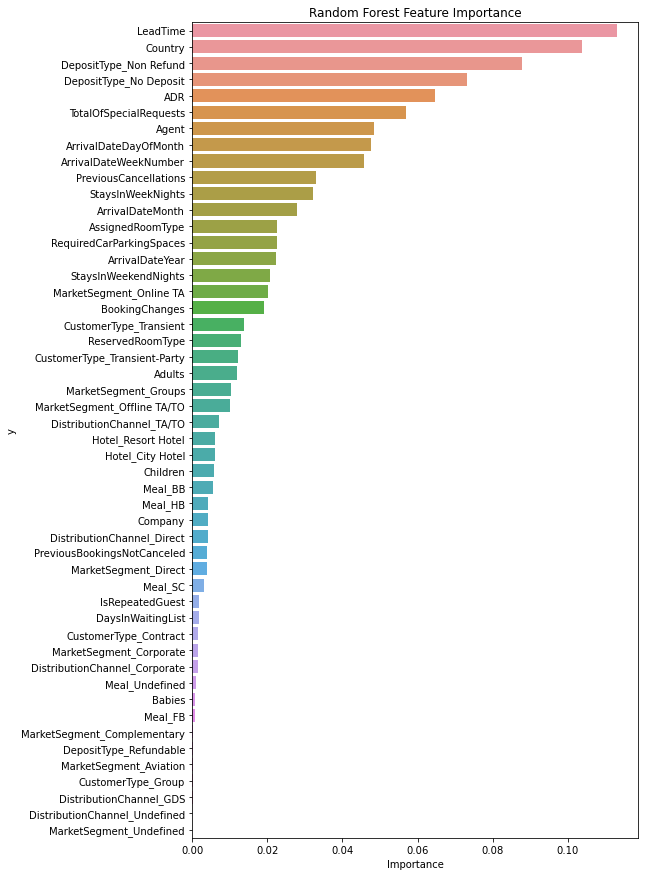

In [49]:
plt.figure(figsize=(8,15))
f=sns.barplot(data=forest_df,y='y',x='x')
f.set_title('Random Forest Feature Importance')
f.set_xlabel('Importance')

XGB Classifer's Most Important Features from Scikit-learn Feature Importance

In [54]:
import seaborn as sns
xgb_df = pd.DataFrame(xgb_dict.items(),columns=['y','x'])
xgb_df.sort_values(by='x',ascending=False, inplace=True)

(0.0, 0.1)

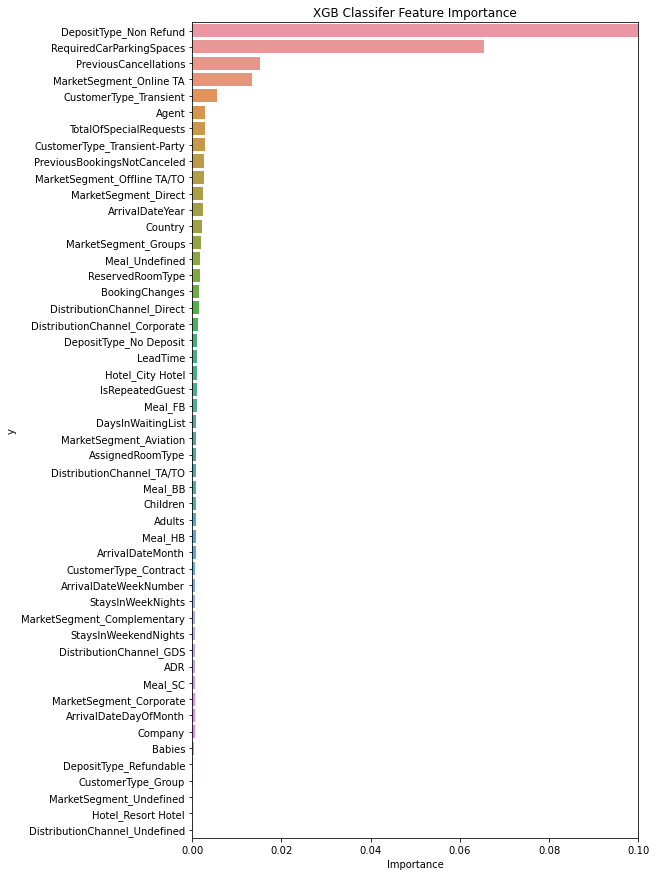

In [55]:
plt.figure(figsize=(8,15))
f=sns.barplot(data=xgb_df,y='y',x='x')
f.set_title('XGB Classifer Feature Importance')
f.set_xlabel('Importance')
f.set_xlim(0,0.1)

<Figure size 2000x1600 with 0 Axes>

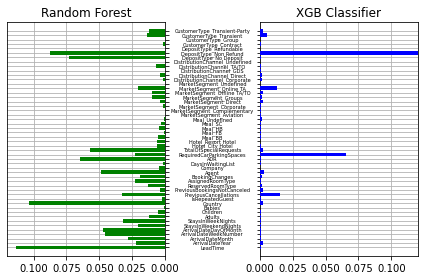

In [53]:
# Putting the feature importance of Random Forest and XGB Classifier for comparison, but the comparison does not look clear
# and this plot is not to be used in the powerpoint
import numpy as np
import matplotlib.pyplot as plt

# Data
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children','Babies', 'Country', 'IsRepeatedGuest', 'PreviousCancellations','PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType','BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'ADR','RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'Hotel_City Hotel', 'Hotel_Resort Hotel', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Meal_SC', 'Meal_Undefined',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'MarketSegment_Undefined',
       'DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'DistributionChannel_Undefined', 'DepositType_No Deposit',
       'DepositType_Non Refund', 'DepositType_Refundable',
       'CustomerType_Contract', 'CustomerType_Group', 'CustomerType_Transient','CustomerType_Transient-Party']


y = np.arange(forest_importance.size)

plt.figure(figsize=(10,8),dpi=200)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, forest_importance, align='center', color='green', zorder=10)
axes[0].set(title='Random Forest')
axes[0].set_xlim(0,0.12)
axes[1].barh(y, xgb_importance, align='center', color='blue', zorder=10)
axes[1].set(title='XGB Classifier')
axes[1].set_xlim(0,0.12)

axes[0].invert_xaxis()
axes[0].set(yticks=y)
#axes[0].set_yticklabels(features,fontsize=20)
axes[0].set(yticks=y, yticklabels=[])
for yloc, state in zip(y, features):
    axes[0].annotate(state, (0.5, yloc), xycoords=('figure fraction', 'data'),ha='center', va='center',fontsize=5)
axes[0].yaxis.tick_right()
#axes[0].tick_params(axis='y', which='major', labelsize=2)

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)


fig.tight_layout()
fig.subplots_adjust(wspace=0.6)
plt.show()

## 4. Retrain Random Forest Model with the 10 Most Important Features

Using The 10 Most Important Features from Scikit-learn's Feature Importance

In [66]:
#retrain with most important features
x_forest=df[['LeadTime', 'Country', 'DepositType_Non Refund     ','DepositType_No Deposit     ',
             'ADR', 'TotalOfSpecialRequests', 'Agent', 'ArrivalDateDayOfMonth', 'ArrivalDateWeekNumber',
            'PreviousCancellations']]
y_forest=df[['IsCanceled']]

from sklearn.model_selection import train_test_split
x_train_forest,x_test_forest,y_train_forest,y_test_forest = train_test_split(x_forest,y_forest,test_size=0.2,random_state=1111)

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_10_features_sk = RandomForestClassifier(random_state=1111)
forest_10_features_sk.fit(x_train_forest,y_train_forest)
y_pred_forest = forest_10_features_sk.predict(x_test_forest)

print(classification_report(np.array(y_test_forest),np.array(y_pred_forest)))
print(accuracy_score(y_pred_forest,y_test_forest))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15130
           1       0.86      0.78      0.82      8748

    accuracy                           0.87     23878
   macro avg       0.87      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878

0.8730211910545271


Using The 10 Most Important Features from Permutation Importance

In [69]:
x_forest_pi=df[['Country', 'TotalOfSpecialRequests', 'Agent', 'LeadTime', 'MarketSegment_Online TA',
               'PreviousCancellations', 'ArrivalDateYear', 'AssignedRoomType', 'CustomerType_Transient',
               'RequiredCarParkingSpaces']]
y_forest_pi=df[['IsCanceled']]

from sklearn.model_selection import train_test_split
x_train_forest_pi,x_test_forest_pi,y_train_forest_pi,y_test_forest_pi = train_test_split(x_forest_pi,y_forest_pi,test_size=0.2,random_state=1111)

    

In [70]:
forest_10_features_pi = RandomForestClassifier(random_state=1111)
forest_10_features_pi.fit(x_train_forest_pi,y_train_forest_pi)
y_pred_forest_pi = forest_10_features_pi.predict(x_test_forest_pi)

print(classification_report(np.array(y_test_forest_pi),np.array(y_pred_forest_pi)))
print(accuracy_score(y_pred_forest_pi,y_test_forest_pi))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     15130
           1       0.83      0.80      0.81      8748

    accuracy                           0.86     23878
   macro avg       0.86      0.85      0.85     23878
weighted avg       0.86      0.86      0.86     23878

0.8646871597286205


## 5. Retrain XGB Classifier with the 10 Most Important Features

Using The 10 Most Important Features from Scikit-learn's Feature Importance

In [71]:
#retrain with most important features
x_xgb=df[['DepositType_Non Refund     ', 'RequiredCarParkingSpaces', 'PreviousCancellations', 'MarketSegment_Online TA',
         'CustomerType_Transient', 'Agent', 'TotalOfSpecialRequests', 'CustomerType_Transient-Party',
         'PreviousBookingsNotCanceled', 'MarketSegment_Offline TA/TO']]
y_xgb=df[['IsCanceled']]

from sklearn.model_selection import train_test_split
x_train_xgb,x_test_xgb,y_train_xgb,y_test_xgb = train_test_split(x_xgb,y_xgb,test_size=0.2,random_state=1111)

In [73]:
from xgboost import XGBClassifier
xgb_model_10_features_sk = XGBClassifier()
xgb_model_10_features_sk.fit(x_train_xgb, y_train_xgb)
y_pred_xgb = xgb_model_10_features_sk.predict(x_test_xgb)

print(classification_report(np.array(y_test_xgb),np.array(y_pred_xgb)))
print(accuracy_score(y_pred_xgb,y_test_xgb))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     15130
           1       0.83      0.60      0.70      8748

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.78     23878
weighted avg       0.81      0.81      0.80     23878

0.8101181003434124


Using The 10 Most Important Features from Permutation Importance

In [74]:
x_xgb_pi=df[['Country', 'LeadTime', 'Agent', 'TotalOfSpecialRequests', 'AssignedRoomType', 'ReservedRoomType',
             'DepositType_Non Refund     ', 'PreviousCancellations', 'ArrivalDateYear', 'ADR']]
y_xgb_pi=df[['IsCanceled']]

from sklearn.model_selection import train_test_split
x_train_xgb_pi,x_test_xgb_pi,y_train_xgb_pi,y_test_xgb_pi = train_test_split(x_xgb_pi,y_xgb_pi,test_size=0.2,random_state=1111)

    

In [75]:
from xgboost import XGBClassifier
xgb_model_10_features_pi = XGBClassifier()
xgb_model_10_features_pi.fit(x_train_xgb_pi, y_train_xgb_pi)
y_pred_xgb_pi = xgb_model_10_features_pi.predict(x_test_xgb_pi)

print(classification_report(np.array(y_test_xgb_pi),np.array(y_pred_xgb_pi)))
print(accuracy_score(y_pred_xgb_pi,y_test_xgb_pi))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15130
           1       0.84      0.77      0.80      8748

    accuracy                           0.86     23878
   macro avg       0.85      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878

0.8605829633972695
